# PHYS 512 Problem Set 1

## Alex Laroche (260854146)

In [77]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt

## Problem 1

$(a)$ We may combine

$$f'_{(a)}(x) \approx \frac{f(x+\delta)-f(x-\delta)}{2\delta}
        \approx f'(x) + \frac{1}{3!}f'''(x)\delta^2
        + \frac{1}{5!}f^{(5)}(x)\delta^4+\dots$$
        
and

$$f'_{(b)}(x) \approx \frac{f(x+2\delta)-f(x-2\delta)}{4\delta}
        \approx f'(x) + \frac{2}{3}f'''(x)\delta^2
        + \frac{2}{15}f^{(5)}(x)\delta^4+\dots$$

in the following way,

$$f'(x)\approx \frac{4f'_{(a)}(x)-f'_{(b)}(x)}{3}
        \approx f'(x) - \frac{1}{30}f^{(5)}(x)\delta^4,$$
        
which elimintaes the third order term. Plugging $f'_{(a)}$ and $f'_{(b)}$ into the above, we may write the derivative as 

$$f'(x) \approx \frac{8f(x+\delta)-8f(x-\delta)+f(x-2\delta)-f(x+2\delta)}{12\delta}.$$

$(b)$ The variance is now

$$\sigma^2 \sim \left(\frac{\epsilon f}{\delta}\right)^2
        + \left(f^{(5)}\delta^4\right)^2,$$
        
where $\epsilon$ is the machine precision. The first term comes from roundoff and the second from truncation. Varying $\delta$ to minimize error gives

$$\frac{d\sigma^2}{d\delta} \approx 
        \frac{\epsilon^2f^2}{\delta^3} + (f^{(5)})^2\delta^7=0.$$

Thus, the optimal $\delta$ is

$$\delta \sim \left(\frac{\epsilon f}{f^{(5)}}\right)^{1/5}.$$

For $f=e^x,$ $\delta\sim\epsilon^{1/5}$ and for $f=e^{0.01x},$ $\delta\sim10^2\epsilon^{1/5}.$ For these $\delta,$ the percent error on the derivatives are $O(10^{-13}),$ close enough, see plot below.

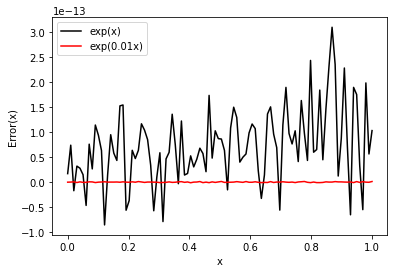

In [353]:
eps=1e-15 #double precision
x=np.linspace(0,1,100) # x values

### exp(x)

delta1=eps**(1/5) # optimal delta
temp=x+delta1
delta1=temp-x
# compute derivative estimate with formula, see pdf
dvest1=(8*(np.exp(x+delta1)-np.exp(x-delta1))+np.exp(x-2*delta1)-np.exp(x+2*delta1))/(12*delta1)
err1=np.exp(x)-dvest1 # abs error
plt.plot(x,err1,label='exp(x)',color='k') # plot error

### exp(0.01x)

#all steps the same as above
delta2=1e2*eps**(1/5)
temp=x+delta2
delta2=temp-x
dvest2=(8*(np.exp(0.01*(x+delta2))-np.exp(0.01*(x-delta2)))+np.exp(0.01*(x-2*delta2))
        -np.exp(0.01*(x+2*delta2)))/(12*delta2) 
err2=0.01*np.exp(0.01*x)-dvest2
plt.plot(x,err2,label='exp(0.01x)',color='r')

plt.ylabel('Error(x)')
plt.xlabel('x')
plt.legend()
plt.show()

## Problem 2

The third derivative of $f$ may be written as

$$\begin{align*}f'''(x)&\approx\frac{f''(x)-f''(x-dx)}{dx} \\
    &\approx\frac{f(x+dx)+f(x-dx)-2f(x)-f(x)-f(x-2dx)+2f(x-dx)}{dx^3} \\
    &\approx\frac{f(x+dx)-3f(x)+3f(x-dx)-f(x-2dx)}{dx^3}\end{align*},$$
    
where the second equality uses the formula for $f''$ derived in lecture. We may use this formula to estimate the optimal $dx,$

$$dx\sim\left(\frac{\epsilon f}{f'''}\right)^{1/3}.$$

We first assume that $dx\sim\epsilon^{1/3}.$ Using this $dx$ we then compute $f'''$ and $f$ and plug into the above formula to get an optimal estimate for $dx.$ This is what the $\texttt{dxest}$ function accomplishes. $\texttt{ndiff}$ then uses the $dx$ to compute the numerical derivative using the centered derivative formula.

In [79]:
def ndiff(fun,x,full=False):
    '''
    Returns the numerical derivative of 'fun' at 'x'. If full=False only return derivatives, if full=True
    return derivatives, dxs and error estimates.
    
    :param fun: numpy function
    :param x: float or array of x values
    :param full: boolean specifying outpute
    '''
    dx,df3=dxest(fun,x) #get optimal dxs, also get f''' for error estimates
    df=(fun(x+dx)-fun(x-dx))/(2*dx) #compute derivative
    if full:
        err = np.sqrt((1e-15*np.abs(fun(x)/dx))**2 + np.abs(dx**2*df3)**2) # add roundoff and trunc error
        return df,dx,err
    return df

def dxest(fun,x):
    '''
    Returns the optimal dx for the numerical derivative of 'fun' at 'x'
    
    :param fun: numpy function
    :param x: float or array of x values
    '''
    eps=1e-15 #double precision
    dx=eps**(1/3) #dx estimate
    temp=x+dx #representable number fix
    dx=temp-x 
    df3=(fun(x+dx)-3*fun(x)+3*fun(x-dx)-fun(x-2*dx))/dx**3 #third derivative, see pdf for derivation
    return np.abs(eps*fun(x)/df3)**(1/3),df3

Let's use $\texttt{ndiff}$ to compute the derivative, and corresponding relative error, of $\exp(x).$

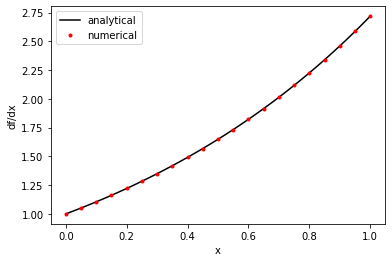

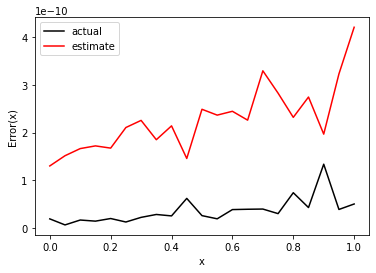

In [350]:
fun=np.exp
xmin,xmax=0,1
full=True

x=np.linspace(xmin,xmax,100) #xs to plot analytical derivative
xdv=np.linspace(xmin,xmax,21) #xs to plot numerical derivative

dv,dx,err=ndiff(fun,xdv,full) #compute numerical derivative

#plot numerical and compare to analytical
plt.plot(x,np.exp(x),color='k',label='analytical')
plt.plot(xdv,dv,'.',color='r',label='numerical')
plt.legend()
plt.xlabel('x')
plt.ylabel('df/dx')
plt.show()

#plot estimated relative error and compare to actual error
plt.plot(xdv,dv-np.exp(xdv),color='k',label='actual')
plt.plot(xdv,err,color='r',label='estimate')
plt.legend()
plt.xlabel('x')
plt.ylabel('Error(x)')
plt.show()

## Problem 3

In [387]:
from sklearn.utils import resample

def interptemp(V,data,n_subsets=50):
    '''
    Returns interpolated temperature values at 'V' given 'data' and estimated error at each point
    
    :param V: float/int or numpy array of voltages
    :param data: numpy array containing T,V data
    :param n_subsets: int number of subsets to draw for bootstrap resamle error estimate
    '''
    T_arr,V_arr,_=data.T #get T,V arrays
    T_arr,V_arr=T_arr[::-1],V_arr[::-1] #order data from small to large V
    spl=interpolate.splrep(V_arr,T_arr) #get spline
    err=booterr(V,V_arr,T_arr,n_subsets=n_subsets) #boostrap resample error
    return interpolate.splev(V,spl),err #evaluate spline

def booterr(V,V_arr,T_arr,n_subsets):
    '''
    Returns estimated error using bootstrap resampling method
    
    :param V: float/int array of voltages
    :param V_arr: array voltage data
    :param T_arr: array temperature data
    :param n_subsets: int number of subsets to draw from data
    '''
    subsets=[resample(V_arr,T_arr,n_samples=int(len(V_arr)/2),replace=False) for i in range(n_subsets)] #draw subsets
    orderedsubs=[list(zip(*sorted(list(zip(ss[0],ss[1]))))) for ss in subsets] #order data
    spls=[interpolate.splrep(np.array(ss[0]),np.array(ss[1])) for ss in orderedsubs] #get splines from each subset
    evals=[interpolate.splev(V,spl) for spl in spls] #evaluate each spline at Vs
    mean=np.mean(evals,axis=0) #mean of each interpolated point
    var=np.sum((evals-mean)**2,axis=0)/(len(evals)-1) #variance
    return np.sqrt(var) #estimated error

Let's interpolate some data points and take a look at the estimated error.

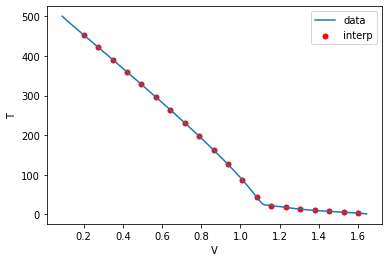

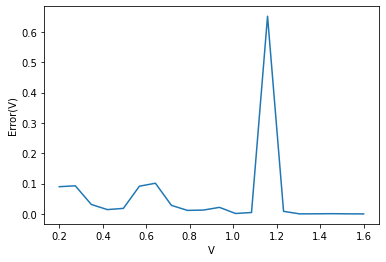

In [388]:
data=np.loadtxt('lakeshore.txt')
V=np.linspace(0.2,1.6,20)
T_int,err=interptemp(V,data) #interpolate T for V array

V_arr,T_arr,_=data.T
var=bootresample(V,V_arr,T_arr)

#plot interpolated T in comparison to data
plt.plot(data.T[1],data.T[0],label='data')
plt.scatter(V,T_int,color='r',marker='.',s=100,label='interp')
plt.xlabel('V')
plt.ylabel('T')
plt.legend()
plt.show()

#plot estimated error from bootstrap resample method
plt.plot(V,err)
plt.xlabel('V')
plt.ylabel('Error(V)')
plt.show()

The boostrap resample method appears to be working correctly since it detects a large error at the voltage where $dV/dT$ abruptly changes. The error size also seems pretty reasonable.

## Problem 4

In [21]:
def rateval(p,q,xx):
    '''
    Returns array of the rational function 'p(x)/q(x)' evaluated at 'xx'
    
    :param p: array of numerator polynomial coefficients
    :param q: array of denominator polynomial coefficients
    :param xx: array of values to be evaluated
    '''
    num,den=0,1 #non-zero denominator to avoid singularities
    for i in range(len(p)):#compute numerator
        num+=p[i]*xx**i 
    for i in range(len(q)):#compute denominator
        den+=q[i]*xx**(i+1) 
    return num/den
    
def getrat(x,y,n,m,pinv=False):
    '''
    Returns two arrays specifying polynomial coefficients for numerator and denominator
    of a rational function fit to data 'x,y'
    
    :param x: array of x points
    :param y: array of f(x) points
    :param n: int order of numerator
    :param m: int order of denominator
    :param pinv: boolean use inv or pinv
    '''
    assert(len(x)==n+m-1 & len(y)==len(x)) #avoid order & length errors
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i #fill first n columns with x^i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i #fill last m columns with -yx^i 
    if pinv:
        vec=np.dot(np.linalg.pinv(mat),y)
    else:
        vec=np.dot(np.linalg.inv(mat),y)
    return vec[:n],vec[n:] #p,q

Let's compare the accuracy of each method for $\cos{x}$ between $[-\pi/2,\pi/2].$

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


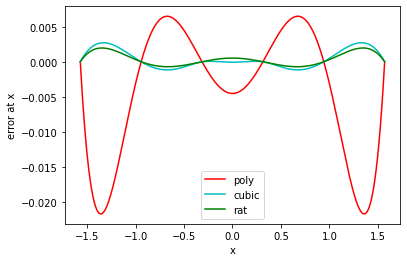

In [22]:
xmin,xmax=-np.pi/2,np.pi/2
n,m=3,4
x=np.linspace(xmin,xmax,n+m-1)
y=np.cos(x)
xx=np.linspace(x[0],x[-1],1001)
yy=np.cos(xx)

# polynomial
pp=np.polyfit(x,y,n+m)
yy_p=np.polyval(pp,xx)

# cubic spline
cc=interpolate.splrep(x,y)
yy_c=interpolate.splev(xx,cc)

# rational
p,q=getrat(x,y,n,m)
yy_r=rateval(p,q,xx)

plt.plot(xx,yy_p-yy,'r',label='poly')
plt.plot(xx,yy_c-yy,'c',label='cubic')
plt.plot(xx,yy_r-yy,'g',label='rat')
plt.xlabel('x')
plt.ylabel('error at x')
plt.legend()
plt.show()

As expected, the polynomial fit has a lot of wiggles and does a far worse job than the cubic spline and rational function interpolations which have roughly equivalent errors.

We will repeat the above for $1/(1+x^2)$ between $[-1,1].$ The poles at $x=\pm i$ mean that the rational function interpolation will now perform far better than the cubic spline. The error for the rational function fit should be very close to zero since we are fitting a rational function which obviously has an exact solution.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


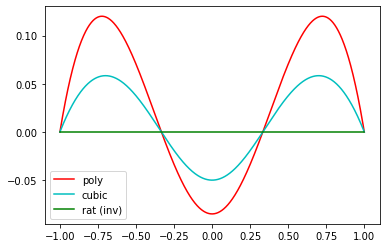

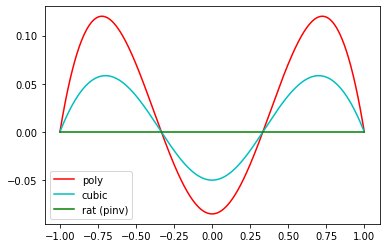

In [23]:
### low order Lorentz interpolation

xmin,xmax=-1,1
n,m=2,3
x=np.linspace(xmin,xmax,n+m-1)
lor=lambda x: 1/(1+x**2)
y=lor(x)
xx=np.linspace(x[0],x[-1],1001)
yy=lor(xx)

# polynomial
pp=np.polyfit(x,y,n+m)
yy_p=np.polyval(pp,xx)

# cubic spline
cc=interpolate.splrep(x,y)
yy_c=interpolate.splev(xx,cc)

# rational
p,q=getrat(x,y,n,m)
yy_r=rateval(p,q,xx)

plt.plot(xx,yy_p-yy,'r',label='poly')
plt.plot(xx,yy_c-yy,'c',label='cubic')
plt.plot(xx,yy_r-yy,'g',label='rat (inv)')
plt.legend()
plt.show()

# rational with pinv
pinv=True
p2,q2=getrat(x,y,n,m,pinv)
yy_r2=rateval(p2,q2,xx)

plt.plot(xx,yy_p-yy,'r',label='poly')
plt.plot(xx,yy_c-yy,'c',label='cubic')
plt.plot(xx,yy_r2-yy,'g',label='rat (pinv)')
plt.legend()
plt.show()

In [24]:
# inv coefficients
p,q

(array([1.0000000e+00, 4.4408921e-16]), array([8.8817842e-16, 1.0000000e+00]))

In [25]:
# pinv coefficients
p2,q2

(array([1.0000000e+00, 4.4408921e-16]), array([8.8817842e-16, 1.0000000e+00]))

For low order, $n=2,m=3,$ both $\texttt{inv}$ and $\texttt{pinv}$ appear to give the same errors. The rational function interpolation has an exact solution with almost zero error, performing far better than both cubic spline and polynomial interpolation. The $p,q$ coefficients for both matrix inversion methods reflect this.

We will now increase the order, $n=4,m=5,$ and see what happens.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


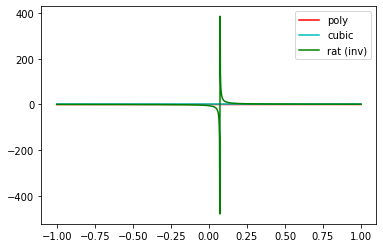

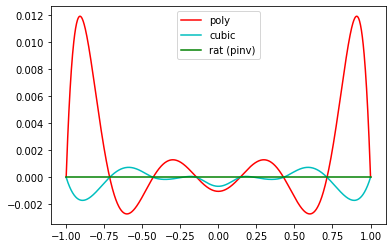

In [33]:
### high order Lorentz interpolation

xmin,xmax=-1,1
n,m=4,5
x=np.linspace(xmin,xmax,n+m-1)
lor=lambda x: 1/(1+x**2)
y=lor(x)
xx=np.linspace(x[0],x[-1],1001)
yy=lor(xx)

# polynomial
pp=np.polyfit(x,y,n+m)
yy_p=np.polyval(pp,xx)

# cubic spline
cc=interpolate.splrep(x,y)
yy_c=interpolate.splev(xx,cc)

# rational
p,q=getrat(x,y,n,m)
yy_r=rateval(p,q,xx)

plt.plot(xx,yy_p-yy,'r',label='poly')
plt.plot(xx,yy_c-yy,'c',label='cubic')
plt.plot(xx,yy_r-yy,'g',label='rat (inv)')
plt.legend()
plt.show()

# rational with pinv
pinv=True
p2,q2=getrat(x,y,n,m,pinv)
yy_r2=rateval(p2,q2,xx)

plt.plot(xx,yy_p-yy,'r',label='poly')
plt.plot(xx,yy_c-yy,'c',label='cubic')
plt.plot(xx,yy_r2-yy,'g',label='rat (pinv)')
plt.legend()
plt.show()

When the order is higher, it is clear that using $\texttt{pinv}$ for the rational function interpolation is the right choice since the errors are close to zero. In contrast, the errors when using $\texttt{inv}$ blow up at $x\approx0.05.$

In [13]:
# inv coefficients
p,q

(array([ -4.29862069, -20.        ,   2.        ,   3.96729867]),
 array([-14.,   4.,  -2.,   0.]))

In [14]:
# pinv coefficients
p2,q2

(array([ 1.00000000e+00,  8.88178420e-16, -3.33333333e-01, -1.77635684e-15]),
 array([ 8.88178420e-16,  6.66666667e-01, -8.88178420e-16, -3.33333333e-01]))

$p,q$ when using $\texttt{inv}$ are much larger than those when using $\texttt{pinv}$ due to the large numbers you get when inverting a matrix with small eigenvalues. This introduces a root into the denominator polynomial $q$ where the error blows up.